# 逻辑回归（Logistic Regression）
  
在训练的初始阶段，我们将要构建一个逻辑回归模型来预测，某个学生是否被大学录取。  
设想你是大学相关部分的管理者，想通过申请学生两次测试的评分，来决定他们是否被录取。  
现在你拥有之前申请学生的可以用于训练逻辑回归的训练样本集。对于每一个训练样本，你有他们两次测试的评分和最后是被录取的结果。  

## 数据可视化

In [95]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
# 读取文件
path = 'ex2data1.txt'
data = pd.read_csv(path, header=None, names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [50]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [51]:
# 按类别分割数据集
positive = data.loc[data['admitted']==1]
negative = data.loc[data['admitted']==0]

negative.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
5,45.083277,56.316372,0
10,95.861555,38.225278,0


In [52]:
positive.head()

,exam1,exam2,admitted
3,60.182599,86.308552,1
4,79.032736,75.344376,1
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1


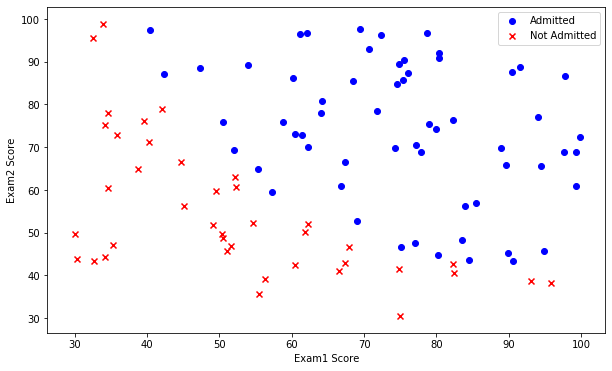

In [53]:
# 绘制图像
plt.figure(figsize=(10, 6))
plt.scatter(positive.exam1, positive.exam2, c='b', marker='o', label='Admitted')
plt.scatter(negative.exam1, negative.exam2, c='r', marker='x', label='Not Admitted')
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend(loc=1)
plt.show()

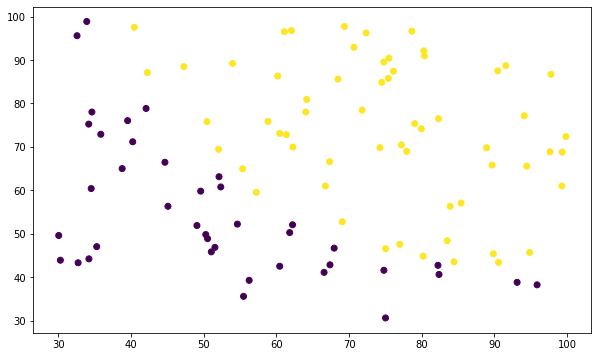

In [54]:
# 方式二：直接用data值进行绘制，不用将数据集分开，但是此时只能区分颜色，无法区分形状
plt.figure(figsize=(10, 6))
plt.scatter(data.exam1, data.exam2, c=data.admitted)
plt.show()

In [55]:
# 因为两个特征的量级一样且数值相差不大，故不用归一化

## Sigmoid函数
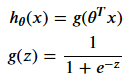

In [56]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

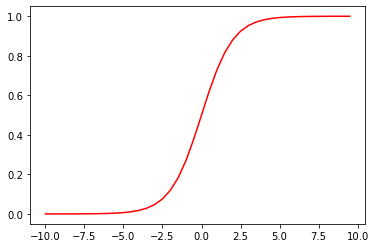

In [57]:
x = np.arange(-10, 10, 0.5)

plt.plot(x, sigmoid(x), 'r')
plt.show()

## 代价函数
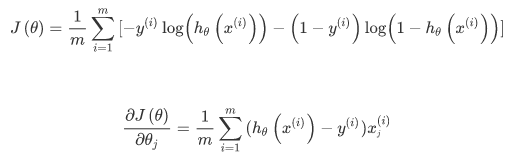

In [58]:
# 实现代价函数
def costFunction(theta, X, y):
    X = np.mat(X)
    y = np.mat(y)
    theta = np.mat(theta)
    
    first = np.multiply(- y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / len(X) 

In [59]:
a = np.mat('1 2 3 4')
b = np.mat('2 2 2 2')

np.multiply(a, b)

matrix([[2, 4, 6, 8]])

## 变量初始化

In [60]:
# 加一列
data.insert(0, 'Ones', 1)

# 初始化变量
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

# 转化为数组array类型
X = np.array(X)
y = np.array(y)
theta = np.zeros(X.shape[1])

In [61]:
# 检查矩阵维数
X.shape, y.shape, theta.shape

((100, 3), (100, 1), (3,))

In [62]:
costFunction(theta, X, y)

0.6931471805599453

## 梯度函数
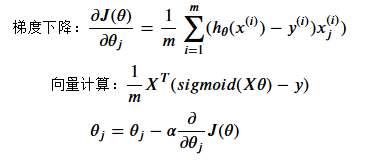

In [63]:
## 实现梯度函数(并没有更新θ)
def gradient(theta, X, y):
    X = np.mat(X)
    y = np.mat(y)
    theta = np.mat(theta)
    
    m = len(X)
    dtheta = (sigmoid(X * theta.T) - y).T * X
    return dtheta / m

In [64]:
gradient(theta, X, y)

matrix([[ -0.1       , -12.00921659, -11.26284221]])

## 用工具箱计算θ的值
在此前的线性回归中，我们自己写代码实现的梯度下降（ex1的2.2.4的部分）。当时我们写了一个代价函数、计算了他的梯度，然后对他执行了梯度下降的步骤。这次，我们不执行梯度下降步骤，而是从scipy库中调用了一个内置的函数fmin_tnc。这就是说，我们不用自己定义迭代次数和步长，功能会直接告诉我们最优解。            

andrew ng在课程中用的是Octave的“fminunc”函数，由于我们使用Python，我们可以用scipy.optimize.fmin_tnc做同样的事情。
（另外，如果对fminunc有疑问的，可以参考下面这篇百度文库的内容https://wenku.baidu.com/view/2f6ce65d0b1c59eef8c7b47a.html ）
如果一切顺利的话，最有θ对应的代价应该是0.203

In [65]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=costFunction, x0=theta, fprime=gradient, args=(X, y))
result

(array([-25.16131849,   0.20623159,   0.20147149]), 36, 0)

In [66]:
result[0][0],result[0][1],result[0][2]

(-25.161318491498374, 0.206231587441317, 0.2014714850703228)

## 决策边界
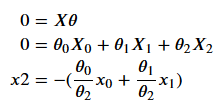

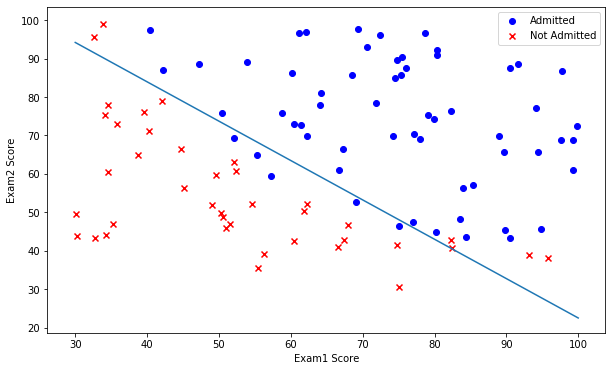

In [67]:
x1 = np.linspace(30, 100, 100)
y_ = -(result[0][0] + result[0][1] * x1) / result[0][2]

plt.figure(figsize=(10, 6))
plt.plot(x1, y_)
plt.scatter(positive.exam1, positive.exam2, c='b', marker='o', label='Admitted')
plt.scatter(negative.exam1, negative.exam2, c='r', marker='x', label='Not Admitted')
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.legend(loc=1)
plt.show()

## 评价逻辑回归模型
写一个predict的函数，给出数据以及参数后，会返回“1”或者“0”。然后再把这个predict函数用于训练集上，看准确率怎样。  
  
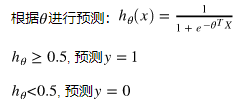


In [68]:
# 预测函数
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [69]:
# 模型正确率
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if a^b == 0 else 0 for (a,b) in zip(predictions, y)]
accuracy = (sum(correct) / len(correct))
print('accuracy = {0:.0f}%'.format(accuracy*100))

accuracy = 89%


# 正则化逻辑回归

## 数据可视化

In [70]:
path = 'ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['test1', 'test2', 'labels'])
data2.head()

,test1,test2,labels
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [71]:
pos = data2.loc[data2['labels']==1]
neg = data2.loc[data2['labels']==0]

neg.head()

,test1,test2,labels
58,0.18376,0.93348,0
59,0.22408,0.77997,0
60,0.29896,0.61915,0
61,0.50634,0.75804,0
62,0.61578,0.72880,0


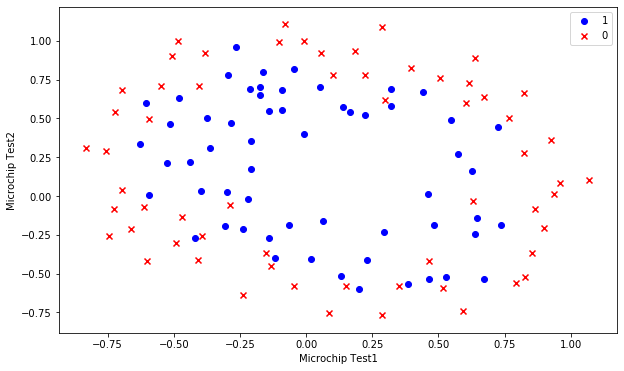

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(pos.test1, pos.test2, c='b', marker='o', label='1')
plt.scatter(neg.test1, neg.test2, c='r', marker='x', label='0')

plt.xlabel('Microchip Test1')
plt.ylabel('Microchip Test2')
plt.legend(loc=0)

plt.show()

以上图片显示，这个数据集不能像之前一样使用直线将两部分分割。而逻辑回归只适用于线性的分割，所以，这个数据集不适合直接使用逻辑回归。

## 特征映射
一种更好的使用数据集的方式是为每组数据创造更多的特征。所以我们为每组添加了最高到6次幂的特征
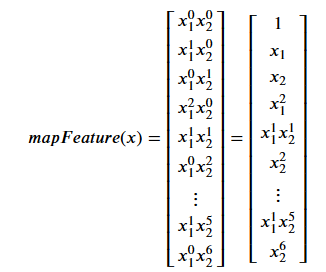

In [3]:
def feature_mapping(x, y, power, as_ndarray=False):
    data = {'f{0}{1}'.format(i-p, p): np.power(x, i-p) * np.power(y, p)
                for i in range(0, power+1)
                for p in range(0, i+1)
           }
    if as_ndarray:
        return pd.DataFrame(data).values
    else:
        return pd.DataFrame(data)

In [4]:
x1 = data2.test1.values
x2 = data2.test2.values

data3 = feature_mapping(x1, x2, power=6)
data3.head()

NameError: name 'data2' is not defined

In [75]:
data3.describe()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.0,0.478970,0.646562,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


## 正则化代价函数
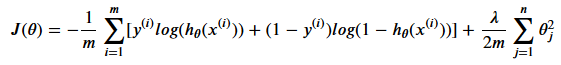

In [76]:
# sigmoid函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # 负号不要丢了

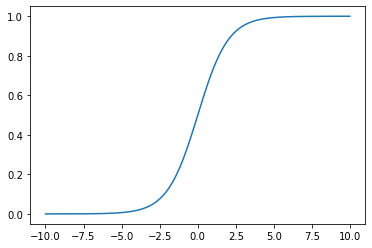

In [77]:
x = np.arange(-10, 10, 0.02)
plt.plot(x, sigmoid(x))
plt.show()

In [78]:
# 正则代价函数
def costReg(theta, X, y, lambdaRate):
    theta = np.mat(theta)
    X = np.mat(X)
    y = np.mat(y)
    
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = lambdaRate / (2*len(X)) * np.sum(np.power(theta[:, 1:], 2)) # 注意是从theta1 开始惩罚的
    return np.sum(first - second) / len(X) + reg

In [79]:
X2 = feature_mapping(x1, x2, power=6, as_ndarray=True)
y2 = np.array(data2.iloc[:, -1:])
theta2 = np.zeros(X2.shape[1])

In [80]:
X2.shape, y2.shape, theta2.shape

((118, 28), (118, 1), (28,))

In [81]:
X2

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [82]:
costReg(theta2, X2, y2, 1)

0.6931471805599454

## 正则化梯度函数
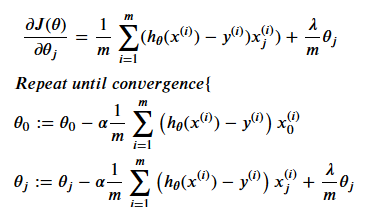

In [83]:
def gradientReg(theta, X, y, lambdaRate):
    theta = np.mat(theta)
    X = np.mat(X)
    y = np.mat(y)
    
    grad = (1 / len(X)) * (sigmoid(X * theta.T) - y).T * X
    reg = np.zeros(X.shape[1])
    reg[0] = 0
    reg[1:] = (lambdaRate / len(X)) * theta[:, 1:]
    
    return grad + reg

In [84]:
lambdaRate = 1
gradientReg(theta2, X2, y2, lambdaRate)

matrix([[8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
         1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
         8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
         1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
         4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
         3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
         4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02]])

## 用工具库求解参数

In [85]:
import scipy.optimize as opt

result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, lambdaRate))
result2

(array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.91743189,
        -1.43166929,  0.12393227, -0.36553118, -0.35725403, -0.17516291,
        -1.4581701 , -0.05098418, -0.61558553, -0.27469165, -1.19271298,
        -0.2421784 , -0.20603298, -0.04466178, -0.27778951, -0.29539513,
        -0.45645981, -1.04319155,  0.02779373, -0.2924487 ,  0.0155576 ,
        -0.32742406, -0.1438915 , -0.92467487]),
 32,
 1)

## 评价逻辑函数

In [86]:
# 预测函数
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [87]:
# 模型正确率
theta_min = np.mat(result2[0])
predictions = predict(theta_min, X2)
correct =  [1 if((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
# accuracy = sum(map(int, correct)) % len(correct)
accuracy = sum(correct) / len(correct)
print('accuracy = {0:.0f}%'.format(accuracy*100))

accuracy = 83%


## 画出决策的曲线

In [88]:
# 得到theta
def find_theta(power, lambdaRate):
    '''
    power: int
        raise x1, x2 to polynomial power
    lambdaRate: int
        lambda constant for regularization term
    '''
    path = 'ex2data2.txt'
    df = pd.read_csv(path, header=None, names=['test1', 'test2', 'labels'])

    x1 = df.test1.values
    x2 = df.test2.values
    
    X2 = feature_mapping(x1, x2, power, as_ndarray=True)
    y2 = np.array(df.iloc[:, -1:])
    theta2 = np.zeros(X2.shape[1])

    res = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, lambdaRate))
    return res[0]

In [89]:
find_theta(power=6, lambdaRate=1)

array([ 1.27271027,  0.62529965,  1.18111686, -2.01987399, -0.91743189,
       -1.43166929,  0.12393227, -0.36553118, -0.35725403, -0.17516291,
       -1.4581701 , -0.05098418, -0.61558553, -0.27469165, -1.19271298,
       -0.2421784 , -0.20603298, -0.04466178, -0.27778951, -0.29539513,
       -0.45645981, -1.04319155,  0.02779373, -0.2924487 ,  0.0155576 ,
       -0.32742406, -0.1438915 , -0.92467487])

In [90]:
# 找决策边界，thetaX = 0, thetaX <= threshhold
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power, as_ndarray=False)

    pred = mapped_cord.values @ theta.T  # array数组进行矩阵乘法
    decision = mapped_cord[np.abs(pred) <= threshhold]

    return decision.f10, decision.f01 # 从28个特征中选出两个特征x1, x2

In [107]:
# 画决策边界
def draw_boundary(power, lambdaRate):
    density = 2000
    threshhold = 2 * 10**(-3)
    
    theta = find_theta(power, lambdaRate)
    x, y = find_decision_boundary(density, power, theta, threshhold) 
    
    df = pd.read_csv(path, header=None, names=['test1', 'test2', 'labels'])
    pos = df.loc[data2['labels']==1]
    neg = df.loc[data2['labels']==0]
    
    plt.rcParams['font.family'] = 'SimHei'
    plt.rcParams['axes.unicode_minus'] = 'False'

    plt.figure(figsize=(12, 8))
    plt.scatter(pos.test1, pos.test2, s=50, c='b', marker='o', label='1')
    plt.scatter(neg.test1, neg.test2, s=50, c='g', marker='x', label='0')
    plt.scatter(x, y, s=50, c='r', marker='.', label='Decision Boundary')

    plt.xlabel('Microchip Test1')
    plt.ylabel('Microchip Test2')
    
    plt.xlabel('Microchip Test1')
    plt.ylabel('Microchip Test2')

    end = time.perf_counter()
    runtime = round(end-start, 2)
    plt.title('用时:' + str(runtime) + ' s')
    
    plt.legend(loc=0)

    plt.show()

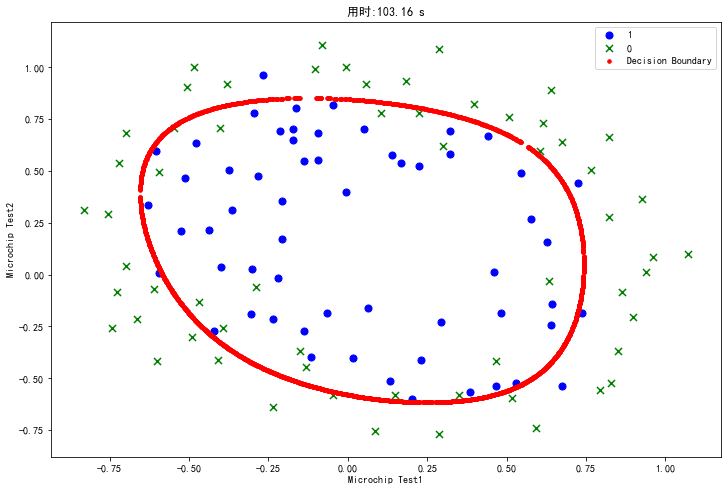

In [108]:
start = time.perf_counter()
draw_boundary(power=6, lambdaRate=1)

## 改变λ，观察决策曲线

### 过拟合  λ=0

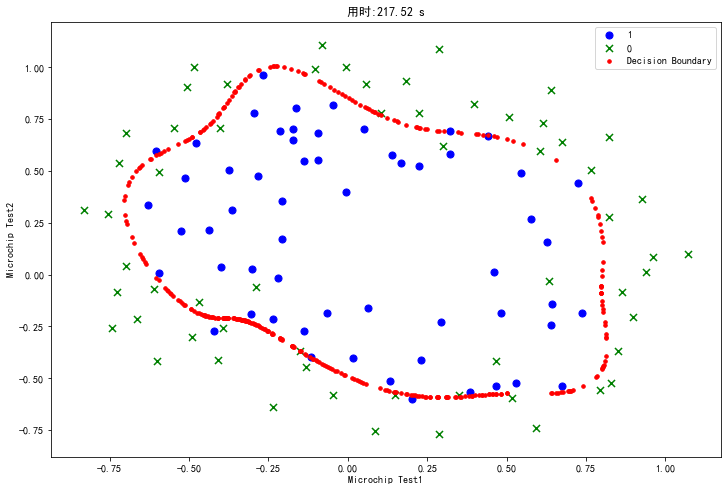

In [109]:
draw_boundary(power=6, lambdaRate=0)

### 欠拟合  λ=100

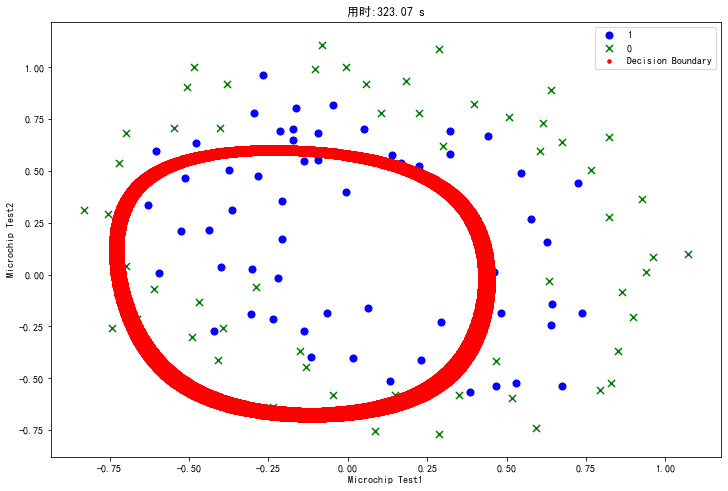

In [110]:
draw_boundary(power=6, lambdaRate=100)